In [1]:
# importar a biblioteca pandas
import pandas as pd
%matplotlib inline

In [2]:
# ler arquivo csv
df = pd.read_csv('MICRODADOS_ENEM_2018_resumo.csv', sep=';', encoding='ISO-8859-1')

In [3]:
df.shape

(5513747, 6)

In [4]:
len(df)

5513747

In [5]:
df.head()

,Unnamed: 0,NU_IDADE,TP_COR_RACA,Q006,NU_NOTA_MT,TP_SEXO
0,0,44.0,1,A,NaN,M
1,1,23.0,3,B,480.3,F
2,2,23.0,1,C,NaN,F
3,3,26.0,3,B,NaN,F
4,4,20.0,0,B,NaN,M


In [6]:
df.tail()

,Unnamed: 0,NU_IDADE,TP_COR_RACA,Q006,NU_NOTA_MT,TP_SEXO
5513742,5513742,56.0,1,D,NaN,F
5513743,5513743,20.0,3,B,528.1,F
5513744,5513744,17.0,3,C,NaN,F
5513745,5513745,17.0,1,D,474.1,F
5513746,5513746,21.0,3,B,498.7,M


In [7]:
df.dtypes

Unnamed: 0       int64
NU_IDADE       float64
TP_COR_RACA      int64
Q006            object
NU_NOTA_MT     float64
TP_SEXO         object
dtype: object

In [8]:
# verificar de uma forma geral os registros nulos NaN
df.isnull().sum()

Unnamed: 0           0
NU_IDADE            97
TP_COR_RACA          0
Q006                 0
NU_NOTA_MT     1608648
TP_SEXO              0
dtype: int64

In [9]:
# Verificar quantos registros nulos existem na coluna NU_IDADE
df['NU_IDADE'].isnull().sum()

97

In [10]:
# remover registros nulos na coluna NU_IDADE
df.dropna(subset=['NU_IDADE'], inplace=True)

In [11]:
# Verificar quantos registros nulos existem na coluna NU_IDADE
df['NU_IDADE'].isnull().sum()

0

In [12]:
# explorar valores estatísticos da coluna NU_IDADE
#df.style.format("{:.2%}")
df['NU_IDADE'].mean()

22.372219854361447

In [13]:
# explorar valores estatísticos da coluna NU_IDADE
df['NU_IDADE'].std()

7.594597160633532

In [14]:
# teste de formatação de números
num1 = 10.456245
num2 = df['NU_IDADE'].mean()

In [15]:
print('O valor da variável num1 é {0:.2f} e a média das idadades é {1:.3f}'.format(num1,num2))

O valor da variável num1 é 10.46 e a média das idadades é 22.372


In [16]:
# outra forma (deprecated) - pode não estar mais disponível nas próximas versões do Python
print('O primeiro valor é %.2f e o segundo valor é %.3f' %(num1,num2))

O primeiro valor é 10.46 e o segundo valor é 22.372


In [17]:
# formatar saídas de metódos para todas as colunas de resposta
df.describe().apply(lambda x: x.apply('{:.2f}'.format))

,Unnamed: 0,NU_IDADE,TP_COR_RACA,NU_NOTA_MT
count,5513650.00,5513650.00,5513650.00,3905026.00
mean,2756859.02,22.37,2.13,535.41
std,1591678.88,7.59,1.02,103.15
min,0.00,10.00,0.00,0.00
25%,1378423.25,18.00,1.00,455.30
50%,2756851.50,19.00,2.00,516.60
75%,4135285.75,24.00,3.00,600.70
max,5513746.00,98.00,5.00,996.10


In [18]:
df['NU_IDADE'].describe().apply(lambda x: format(x,'.2f'))

count    5513650.00
mean          22.37
std            7.59
min           10.00
25%           18.00
50%           19.00
75%           24.00
max           98.00
Name: NU_IDADE, dtype: object

In [19]:
df['NU_IDADE'].describe()

count    5.513650e+06
mean     2.237222e+01
std      7.594597e+00
min      1.000000e+01
25%      1.800000e+01
50%      1.900000e+01
75%      2.400000e+01
max      9.800000e+01
Name: NU_IDADE, dtype: float64

In [20]:
# formatação para strings
nome = 'João'

In [21]:
print('O {0:s} é gente boa'.format(nome))

O João é gente boa


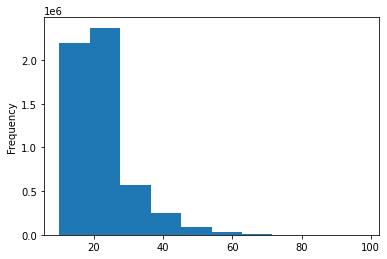

In [22]:
# Gerar um Histograma das Idades para visualizar a distribuição dos dados
df['NU_IDADE'].plot.hist()

In [23]:
# Participantes do ENEM com 10 anos de idade
df.loc[(df['NU_IDADE'] == 10)]

,Unnamed: 0,NU_IDADE,TP_COR_RACA,Q006,NU_NOTA_MT,TP_SEXO
2452472,2452472,10.0,0,G,555.7,F
3395608,3395608,10.0,3,I,486.7,M
3921223,3921223,10.0,2,C,722.2,M
4125283,4125283,10.0,1,H,593.5,F
5171182,5171182,10.0,3,A,NaN,F
5245795,5245795,10.0,3,B,452.4,F


In [24]:
# Participantes com mais de 90 anos
df.loc[(df['NU_IDADE'] > 90)]

,Unnamed: 0,NU_IDADE,TP_COR_RACA,Q006,NU_NOTA_MT,TP_SEXO
4691632,4691632,98.0,3,B,NaN,F


In [25]:
# buscar registros com idade = 10 anos e nota de matemática maior do que 500
df.loc[(df['NU_IDADE'] == 10) & (df['NU_NOTA_MT'] > 500)]

,Unnamed: 0,NU_IDADE,TP_COR_RACA,Q006,NU_NOTA_MT,TP_SEXO
2452472,2452472,10.0,0,G,555.7,F
3921223,3921223,10.0,2,C,722.2,M
4125283,4125283,10.0,1,H,593.5,F


In [26]:
# buscar registros com idade = 10 anos ou nota de matemática maior do que 996
df.loc[(df['NU_IDADE'] == 10) ^ (df['NU_NOTA_MT'] > 996)]

,Unnamed: 0,NU_IDADE,TP_COR_RACA,Q006,NU_NOTA_MT,TP_SEXO
160196,160196,18.0,1,Q,996.1,M
516955,516955,20.0,1,E,996.1,M
604615,604615,18.0,1,M,996.1,M
1028471,1028471,31.0,1,K,996.1,M
2285611,2285611,20.0,0,N,996.1,M
2452472,2452472,10.0,0,G,555.7,F
2453468,2453468,26.0,1,P,996.1,F
2507136,2507136,19.0,1,G,996.1,M
2975948,2975948,18.0,1,P,996.1,M
3015322,3015322,22.0,1,M,996.1,M


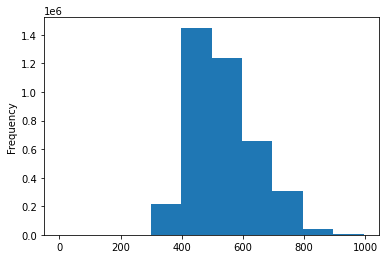

In [27]:
# gerar um histograma das notas de matemática
df['NU_NOTA_MT'].plot.hist()

In [71]:
# Analisar os dados da coluna TP_COR_RACA
# Quantos participantes existem de cada  cor/raça
contagem = df['TP_COR_RACA'].value_counts().sort_index()

In [72]:
# guardar dentro de uma variável tipos os nomes de cada cor/raça
tipos_cor = ('Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena')

In [73]:
tipos_cor

('Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena')

In [74]:
contagem

0     114433
1    1981609
2     698687
3    2561281
4     123609
5      34031
Name: TP_COR_RACA, dtype: int64

In [75]:
# importar uma parte adicional da biblioteca matplotlib denominada PYPLOT e apelidar plt
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

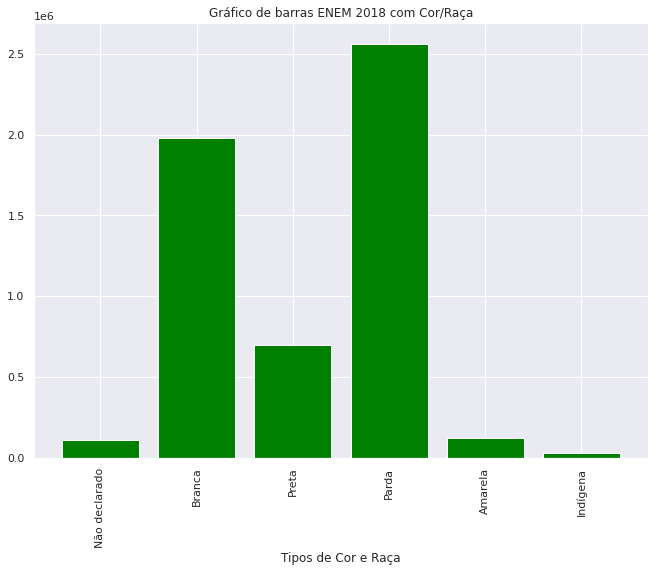

In [76]:
# gerar gráfico de barras utilizando a biblioteca pyplot
plt.title('Gráfico de barras ENEM 2018 com Cor/Raça')
plt.xlabel('Tipos de Cor e Raça')
plt.xticks(rotation=90)
plt.bar(height=contagem, x=tipos_cor, color='green')

## Analisar as informações sobre a renda familiar dos participantes

In [34]:
# guardar na variável tipos as categorias de renda
tipos = ('Nenhuma renda',
'Até R$ 954,00',
'De R$ 954,01 até R$ 1.431,00',
'De R$ 1.431,01 até R$ 1.908,00',
'De R$ 1.908,01 até R$ 2.385,00',
'De R$ 2.385,01 até R$ 2.862,00',
'De R$ 2.862,01 até R$ 3.816,00',
'De R$ 3.816,01 até R$ 4.770,00',
'De R$ 4.770,01 até R$ 5.724,00',
'De R$ 5.724,01 até R$ 6.678,00',
'De R$ 6.678,01 até R$ 7.632,00',
'De R$ 7.632,01 até R$ 8.586,00',
'De R$ 8.586,01 até R$ 9.540,00',
'De R$ 9.540,01 até R$ 11.448,00',
'De R$ 11.448,01 até R$ 14.310,00',
'De R$ 14.310,01 até R$ 19.080,00',
'Mais de R$ 19.080,00')

In [35]:
tipos

('Nenhuma renda',
 'Até R$ 954,00',
 'De R$ 954,01 até R$ 1.431,00',
 'De R$ 1.431,01 até R$ 1.908,00',
 'De R$ 1.908,01 até R$ 2.385,00',
 'De R$ 2.385,01 até R$ 2.862,00',
 'De R$ 2.862,01 até R$ 3.816,00',
 'De R$ 3.816,01 até R$ 4.770,00',
 'De R$ 4.770,01 até R$ 5.724,00',
 'De R$ 5.724,01 até R$ 6.678,00',
 'De R$ 6.678,01 até R$ 7.632,00',
 'De R$ 7.632,01 até R$ 8.586,00',
 'De R$ 8.586,01 até R$ 9.540,00',
 'De R$ 9.540,01 até R$ 11.448,00',
 'De R$ 11.448,01 até R$ 14.310,00',
 'De R$ 14.310,01 até R$ 19.080,00',
 'Mais de R$ 19.080,00')

In [36]:
# contar quantos participantes de cada categoria de renda familiar
contagem = df['Q006'].value_counts().sort_index()

<BarContainer object of 17 artists>

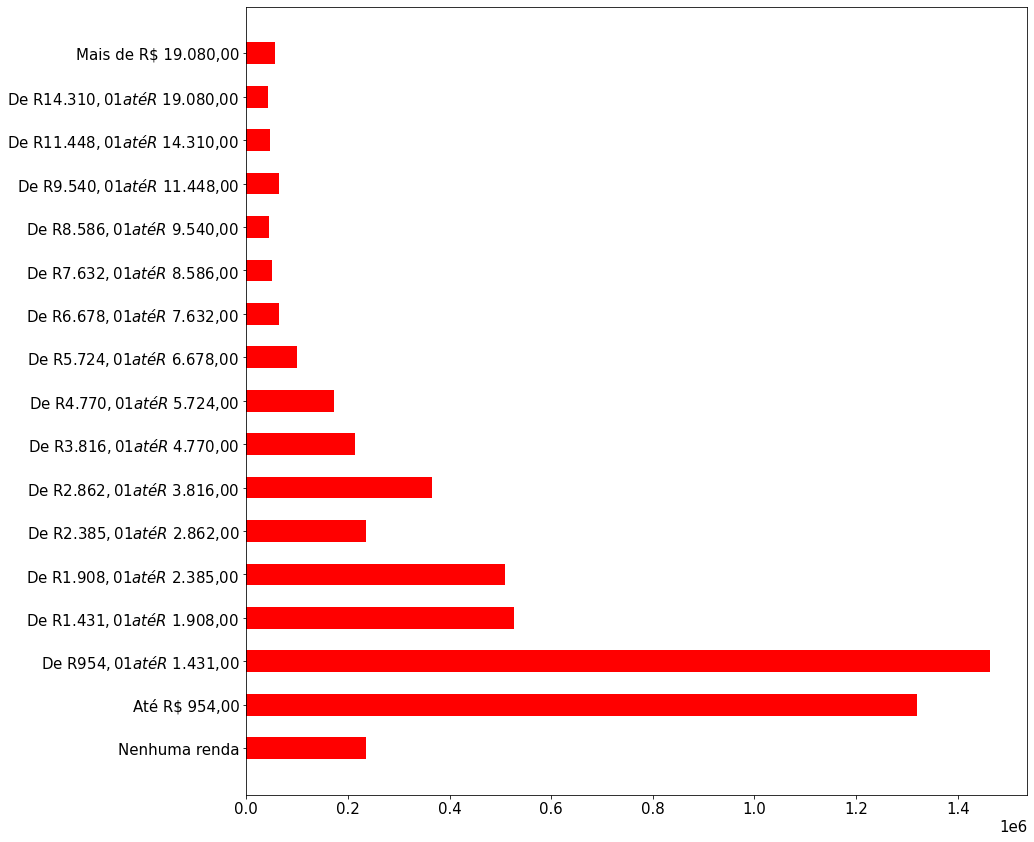

In [37]:
# gerar gráfico de barra horizontal
#definir tamanho da figura
fig = plt.gcf()
fig.set_size_inches(14, 14.5)

# definir tamanho da fonte dos eixos
plt.rcParams.update({'font.size': 15})

plt.barh(y=tipos, width=contagem, height=0.5, color='red')

In [38]:
# Analisar se a renda familiar impacta na média das notas de matemática
media_mat_renda = df.groupby('Q006')['NU_NOTA_MT'].mean()

In [39]:
media_mat_renda

Q006
A    488.114016
B    493.373500
C    511.311586
D    532.344474
E    537.721259
F    557.877201
G    565.189132
H    584.114426
I    596.674506
J    609.700915
K    617.968247
L    629.276921
M    633.268215
N    644.385836
O    654.790044
P    666.032366
Q    682.373609
Name: NU_NOTA_MT, dtype: float64

<BarContainer object of 17 artists>

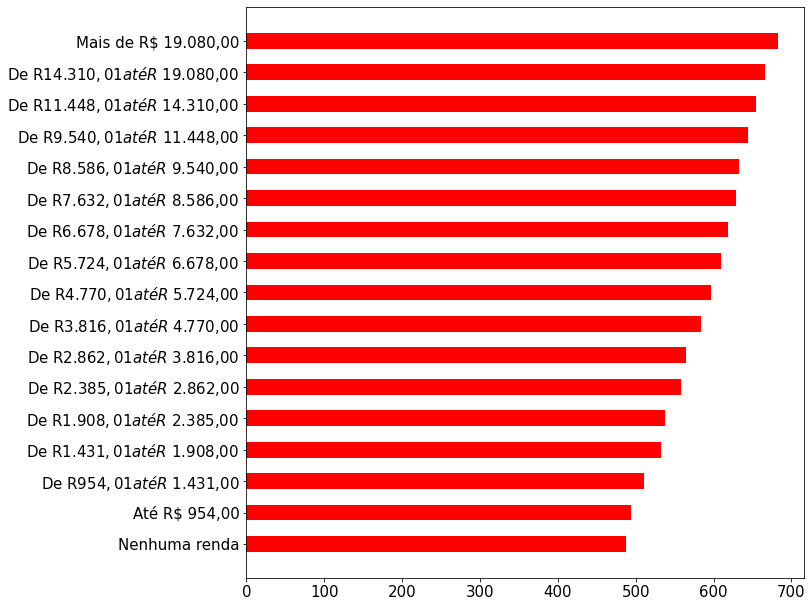

In [40]:
# gerar gráfico de barras
fig = plt.gcf()
fig.set_size_inches(10, 10.5)

# definir tamanho da fonte dos eixos
plt.rcParams.update({'font.size': 15})

plt.barh(y=tipos, width=media_mat_renda, height=0.5, color='red')

In [43]:
# analisar a coluna que indica o sexo do participante
# guardar numa variável a contagem/percentual dos homens e mulheres do dataframe
genero = df['TP_SEXO'].value_counts(normalize=True)

In [44]:
genero

F    0.590833
M    0.409167
Name: TP_SEXO, dtype: float64

([<matplotlib.patches.Wedge at 0x7f882d7d29d0>,
 [Text(-0.3096521476870253, 1.0555167205841947, 'F'),
  Text(0.30965224651163153, -1.0555166915924636, 'M')])

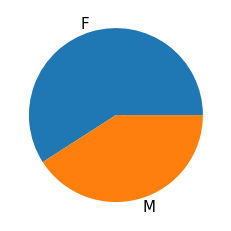

In [46]:
# gerar um gráfico de pizza com os percentuais de homens e mulheres
plt.pie(x=genero, labels = genero.index)

([<matplotlib.patches.Wedge at 0x7f882ba8a2e0>,
 [Text(-0.3096521476870253, 1.0555167205841947, 'Feminino'),
  Text(0.30965224651163153, -1.0555166915924636, 'Masculino')],
 [Text(-0.16890117146565017, 0.5757363930459243, '59.08%'),
  Text(0.16890122536998084, -0.5757363772322528, '40.92%')])

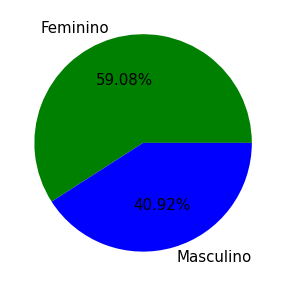

In [49]:
# gerar um gráfico de pizza com algumas configurações adicionais
# definir tamanho da figura
fig = plt.gcf()
fig.set_size_inches(8, 5)

#definir o tamanho da fonte dos eixos
plt.rcParams.update({'font.size': 15})
plt.pie(x=genero, labels = ['Feminino', 'Masculino'], colors=['green','blue'], autopct='%.2f%%')

In [50]:
# importar a biblioteca seaborn
import seaborn as sns

In [58]:
# regressão da renda familiar com as médias da nota de matemática
media_mat_renda

Q006
A    488.114016
B    493.373500
C    511.311586
D    532.344474
E    537.721259
F    557.877201
G    565.189132
H    584.114426
I    596.674506
J    609.700915
K    617.968247
L    629.276921
M    633.268215
N    644.385836
O    654.790044
P    666.032366
Q    682.373609
Name: NU_NOTA_MT, dtype: float64

Text(0.5, 0, 'Randa Familiar')

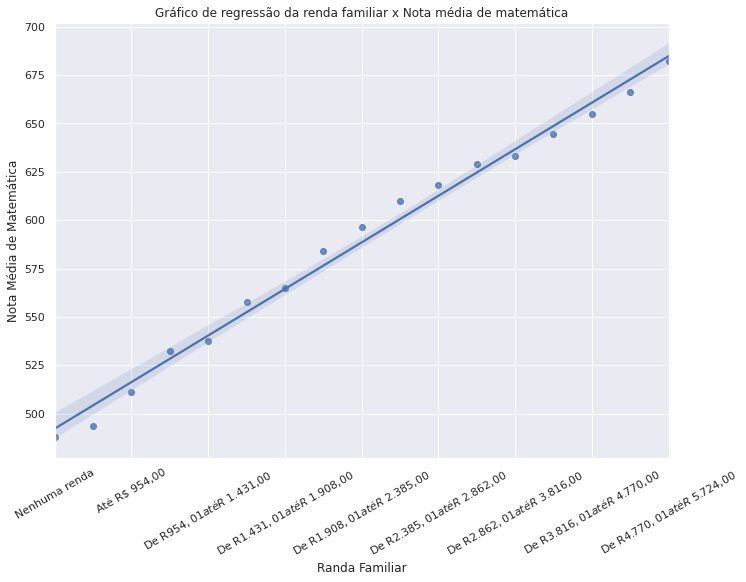

In [61]:
# gerar um gráfico de regressão
#configurar tamanho da figura
sns.set(rc={'figure.figsize':(11, 8)})

# gerar gráfico (.regplot)
ax = sns.regplot(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], y=media_mat_renda)

# configurar eixo x do gráfico
ax.set_xticklabels(tipos, rotation=30)

#configurar título e nomeclatura dos eixos
ax.set_title('Gráfico de regressão da renda familiar x Nota média de matemática')
ax.set_ylabel('Nota Média de Matemática')
ax.set_xlabel('Randa Familiar')


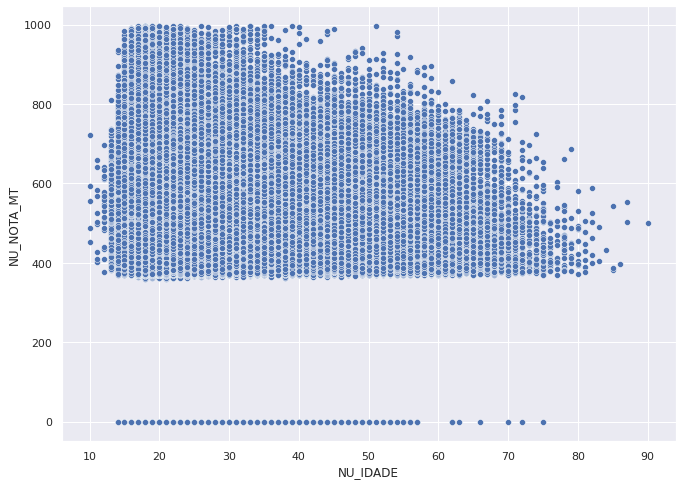

In [62]:
# Gerar um gráfico de dispersão entre variável idade com nota de matemática
sns.scatterplot(x='NU_IDADE', y = 'NU_NOTA_MT', data = df)

In [63]:
# criar um dataframe nota_idade com apenas valores maiores do que zero
nota_idade = df.loc[df['NU_NOTA_MT'] > 0]

In [64]:
nota_idade.head()

,Unnamed: 0,NU_IDADE,TP_COR_RACA,Q006,NU_NOTA_MT,TP_SEXO
1,1,23.0,3,B,480.3,F
5,5,23.0,1,B,538.8,F
7,7,39.0,3,H,733.8,M
8,8,19.0,3,C,459.0,M
9,9,25.0,3,C,525.4,F


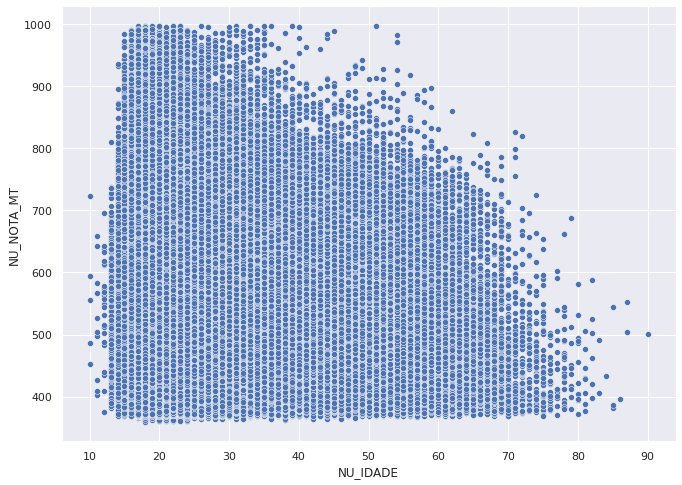

In [65]:
# Gerar um gráfico de dispersão entre variável idade com nota de matemática
sns.scatterplot(x='NU_IDADE', y = 'NU_NOTA_MT', data = nota_idade)

Text(0.5, 0, 'Cor/Raça')

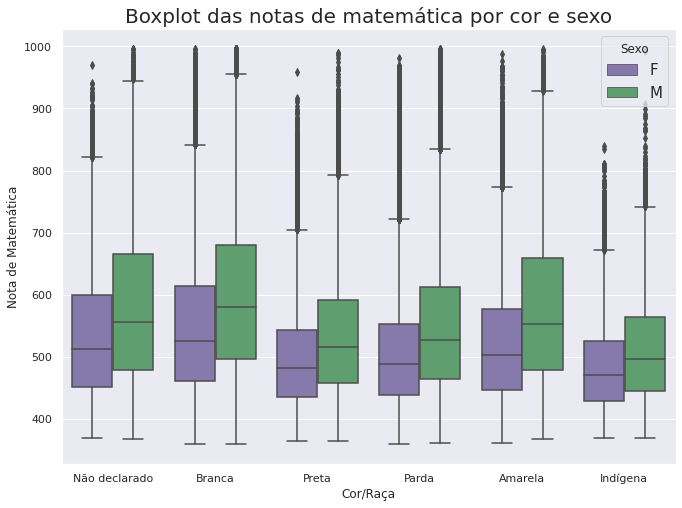

In [81]:
# Gerar um gráfico de boxplot que representa as notas de matemática por cor/raça e sexo dos participantes
#configurar o tamanho da figura
sns.set(rc={'figure.figsize':(11, 8)})

# configurar tema de cor
sns.set_theme(style='darkgrid')

# gerar boxplot
ax = sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO',
                palette=['m', 'g'],
                data = nota_idade)

# configurar legenda
plt.legend(title='Sexo', loc='upper right', fontsize=15)

# configurar nomes do eixo x
plt.xticks([0,1,2,3,4,5], tipos_cor)

#configurar título e nomeclatura dos eixos
ax.set_title('Boxplot das notas de matemática por cor e sexo', fontsize=20)
ax.set_ylabel('Nota de Matemática')
ax.set_xlabel('Cor/Raça')


In [77]:
tipos_cor

('Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena')

## Gerando múltiplos gráficos

[Text(0, 0, 'Nenhuma renda'),
 Text(0, 0, 'Até R$ 954,00'),
 Text(0, 0, 'De R$ 954,01 até R$ 1.431,00'),
 Text(0, 0, 'De R$ 1.431,01 até R$ 1.908,00'),
 Text(0, 0, 'De R$ 1.908,01 até R$ 2.385,00'),
 Text(0, 0, 'De R$ 2.385,01 até R$ 2.862,00'),
 Text(0, 0, 'De R$ 2.862,01 até R$ 3.816,00'),
 Text(0, 0, 'De R$ 3.816,01 até R$ 4.770,00'),
 Text(0, 0, 'De R$ 4.770,01 até R$ 5.724,00'),
 Text(0, 0, 'De R$ 5.724,01 até R$ 6.678,00'),
 Text(0, 0, 'De R$ 6.678,01 até R$ 7.632,00'),
 Text(0, 0, 'De R$ 7.632,01 até R$ 8.586,00'),
 Text(0, 0, 'De R$ 8.586,01 até R$ 9.540,00'),
 Text(0, 0, 'De R$ 9.540,01 até R$ 11.448,00'),
 Text(0, 0, 'De R$ 11.448,01 até R$ 14.310,00'),
 Text(0, 0, 'De R$ 14.310,01 até R$ 19.080,00'),
 Text(0, 0, 'Mais de R$ 19.080,00')]

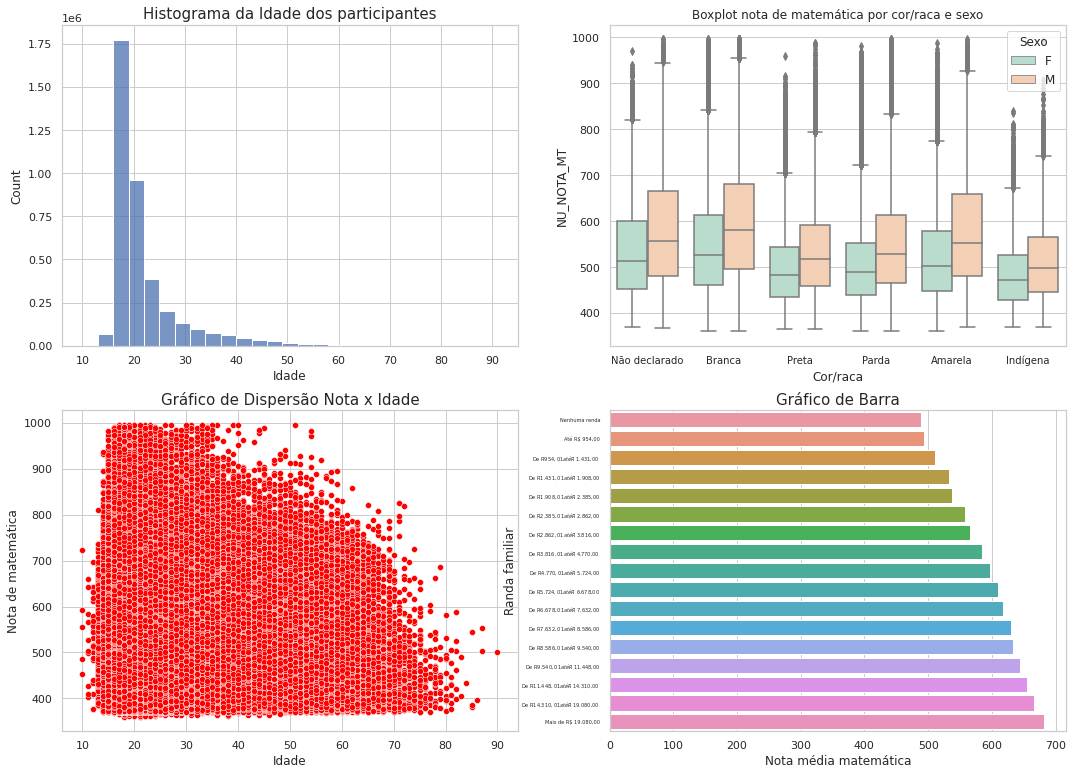

In [88]:
# Gerar múltiplos gráficos
# 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(18, 13))
sns.set_style('whitegrid')

## Gráfico de Histograma na posição linha = 0 e coluna = 0
sns.histplot(ax=axes[0, 0], x='NU_IDADE', binwidth=3, data = nota_idade)
axes[0,0].set_title('Histograma da Idade dos participantes', fontsize ='15')
axes[0,0].set_xlabel('Idade', fontsize='12')

# Gráfico de boxplot
sns.boxplot(ax=axes[0,1], x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO',
                palette='Pastel2',
                data = nota_idade)
# configurar legenda
axes[0,1].legend(title='Sexo', loc='upper right', fontsize=12)

axes[0,1].set_title('Boxplot nota de matemática por cor/raca e sexo', fontsize ='12')
axes[0,1].set_xlabel('Cor/raca', fontsize='12')

# configurar nomes do eixo x
axes[0,1].set_xticklabels(tipos_cor, fontsize=10)

# Gráfico dispersão
sns.scatterplot(ax=axes[1,0], x='NU_IDADE', y = 'NU_NOTA_MT', data = nota_idade, color='red')
axes[1,0].set_title('Gráfico de Dispersão Nota x Idade', fontsize ='15')
axes[1,0].set_xlabel('Idade', fontsize='12')
axes[1,0].set_ylabel('Nota de matemática', fontsize='12')

#gráfico de barra
sns.barplot(ax=axes[1,1], y=media_mat_renda.index, x=media_mat_renda, orient='h')
axes[1,1].set_title('Gráfico de Barra', fontsize ='15')
axes[1,1].set_xlabel('Nota média matemática', fontsize='12')
axes[1,1].set_ylabel('Randa familiar', fontsize='12')

axes[1,1].set_yticklabels(tipos, fontsize=5)


